In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/abhishekjain/Desktop/Data Science Work/ML Project- Algerian Forest Fire Predictor/datasets/Algerian_forest_fire_cleaned.csv")

In [3]:
df.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,Bejaia
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia


In [4]:
df.shape

(243, 16)

In [9]:
df.iloc[242:]

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
242,242,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,Sidi-Bel Abbes


In [11]:
df = df.iloc[0:,1:]

In [21]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,Bejaia
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia


In [28]:
df['Classes'] = df['Classes'].replace('not fire',0)
df['Classes'] = df['Classes'].replace('fire',1)
df['Region'] = df['Region'].replace('Bejaia',0)
df['Region'] = df['Region'].replace('Sidi-Bel Abbes',1)

In [30]:
df[df['Region']==1].head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,0,1
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,0,1
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0,1
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,0,1
126,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,0,1


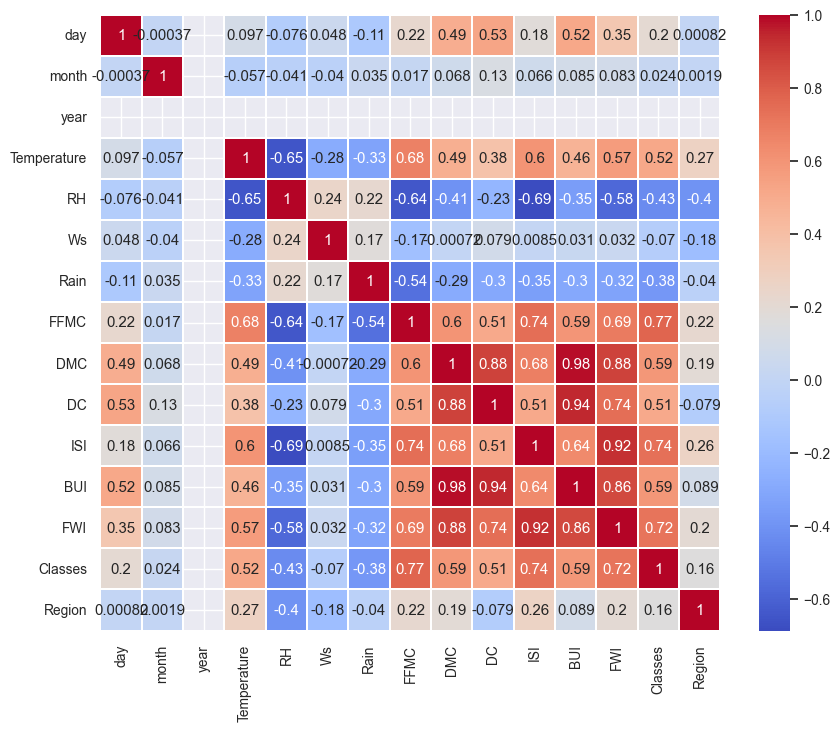

In [31]:
import seaborn as sbn

plt.figure(figsize=(10, 8))  # Adjust the figure size to your preference
sbn.set(font_scale=0.9)  # Increase the font size for better readability

sbn.heatmap(df.corr(),annot= True,cmap='coolwarm', linewidths=1.2)

plt.show()

In [36]:
# divide into independent and dependent features
X = df.drop('FWI',axis=1)
y = df[['FWI']]

In [37]:
y.head()

,FWI
0,0.5
1,0.4
2,0.1
3,0.0
4,0.5


In [38]:
# slip data into test and train
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [39]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((182, 14), (61, 14), (182, 1), (61, 1))

In [40]:
# feature selection

def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


In [41]:
## threshold--domain expertise
corr_features = correlation(X_train,0.85)

In [42]:
corr_features

{'BUI', 'DC'}

In [43]:
## drop features when correlation is more than 0.85

X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [44]:
X_test

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
24,25,6,2012,31,64,15,0.0,86.7,14.2,5.7,1,0
6,7,6,2012,33,54,13,0.0,88.2,9.9,6.4,1,0
152,1,7,2012,28,58,18,2.2,63.7,3.2,1.2,0,1
232,20,9,2012,34,58,13,0.2,79.5,18.7,2.1,0,1
238,26,9,2012,30,65,14,0.0,85.4,16.0,4.5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
162,11,7,2012,34,56,15,2.9,74.8,7.1,1.6,0,1
178,28,7,2012,33,57,16,0.0,87.5,15.7,6.7,1,1
224,12,9,2012,31,72,14,0.0,84.2,8.3,3.8,1,1
230,18,9,2012,36,33,13,0.1,90.6,25.8,9.0,1,1


In [45]:
## Feature scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
X_train_scaled

array([[-1.10036414,  1.3585682 ,  0.        , ..., -0.62963326,
        -1.10431526, -0.98907071],
       [ 0.47831144, -1.34865164,  0.        , ..., -0.93058524,
        -1.10431526,  1.01105006],
       [-0.53655144,  0.45616158,  0.        , ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.66417685,  1.3585682 ,  0.        , ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 1.49317432, -0.44624503,  0.        , ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.53655144,  1.3585682 ,  0.        , ..., -0.86113478,
        -1.10431526, -0.98907071]])

/var/folders/lw/97p97tps55bddkd_rvpmy8400000gn/T/ipykernel_2661/1400855511.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'X_train after scaling')

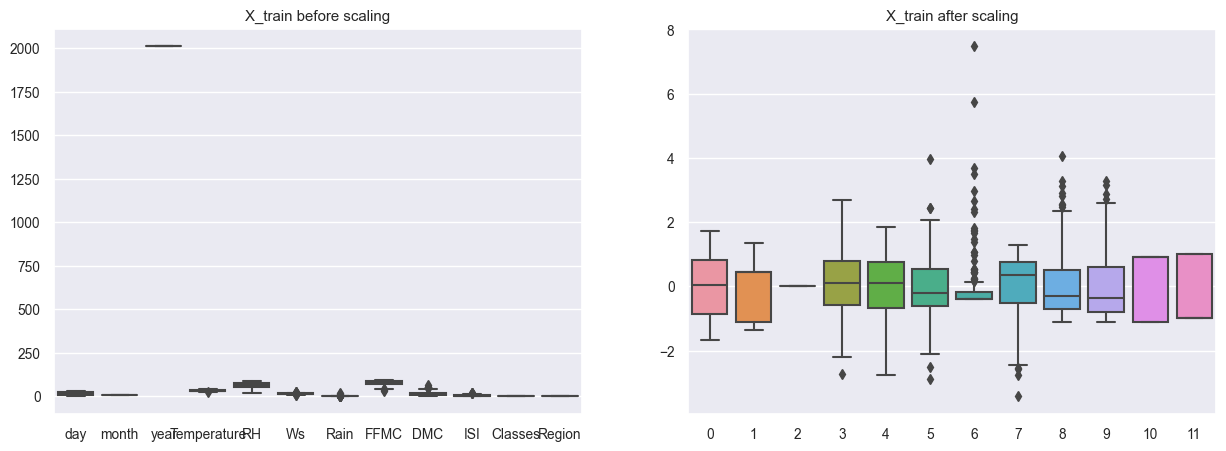

In [47]:
# box plots to understand effects of standard scalar

plt.subplots(figsize = (15,5))
plt.subplot(1,2,1)
sbn.boxplot(data = X_train)
plt.title("X_train before scaling")
plt.subplot(1,2,2)
sbn.boxplot(data = X_train_scaled)
plt.title("X_train after scaling")


### Linear

In [48]:
## linear regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

regressor = LinearRegression()
regressor.fit(X_train_scaled,y_train)
y_test_pred = regressor.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_test_pred)
score = r2_score(y_test,y_test_pred)

print("MAE",mae)
print("R square",score)


MAE 0.5796315075744041
R square 0.9837888473078156


### Lasso

In [49]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_test_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_test_pred)
score = r2_score(y_test,y_test_pred)

print("MAE",mae)
print("R square",score)

MAE 1.1331759902742844
R square 0.9492020277152008


### Ridge

In [50]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_test_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_test_pred)
score = r2_score(y_test,y_test_pred)

print("MAE",mae)
print("R square",score)

MAE 0.5991395275398738
R square 0.9831604230861805


### Elastic net


In [51]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

elastic = ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_test_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_test_pred)
score = r2_score(y_test,y_test_pred)

print("MAE",mae)
print("R square",score)

MAE 1.8558782857277105
R square 0.8760305780807829


### We will use Ridge results as they take care of overfitting as well

### Picking

In [52]:
import pickle

pickle.dump(scaler,open('models/scaler.pkl','wb'))
pickle.dump(ridge,open('models/ridge.pkl','wb'))